In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta  
import time
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
#read csv files
humidity=pd.read_csv("humidity.csv")
pressure=pd.read_csv("pressure.csv")
temperature=pd.read_csv("temperature.csv")
wind_direction=pd.read_csv("wind_direction.csv")
wind_speed=pd.read_csv("wind_speed.csv")
weather_description=pd.read_csv("weather_description.csv")

In [6]:
#take New York for example, merge information in one dataframe
NewYork=pd.merge(humidity[['datetime','New York']],pressure[['datetime','New York']],how='left',on='datetime',suffixes=('_humidity','_pressure'))
NewYork=pd.merge(NewYork,temperature[['datetime','New York']],how='left',on='datetime',suffixes=('','_temperature'))
NewYork=pd.merge(NewYork,wind_direction[['datetime','New York']],how='left',on='datetime',suffixes=('','_wind_direction'))
NewYork=pd.merge(NewYork,wind_speed[['datetime','New York']],how='left',on='datetime',suffixes=('','_wind_speed'))
NewYork=pd.merge(NewYork,weather_description[['datetime','New York']],how='left',on='datetime',suffixes=('','_weather_description'))
NewYork.columns=['datetime','humidity','pressure','temperature','wind_direction','wind_speed','weather_description'] 
NewYork.head()

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,weather_description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,58.0,1012.0,288.220000,260.0,7.0,few clouds
2,2012-10-01 14:00:00,57.0,1012.0,288.247676,260.0,7.0,few clouds
3,2012-10-01 15:00:00,57.0,1012.0,288.326940,260.0,7.0,few clouds
4,2012-10-01 16:00:00,57.0,1012.0,288.406203,260.0,7.0,few clouds


In [7]:
#clean data
NewYork.dropna(axis=0,how='any',inplace=True)           # delete rows including empty elements
NewYork=NewYork.reset_index(drop=True)                  # reset the index
NewYork=NewYork.drop(['wind_direction'], axis=1)        # 'wind_direction' seems to have little meaning, so drop it
NewYork.head()

,datetime,humidity,pressure,temperature,wind_speed,weather_description
0,2012-10-01 13:00:00,58.0,1012.0,288.220000,7.0,few clouds
1,2012-10-01 14:00:00,57.0,1012.0,288.247676,7.0,few clouds
2,2012-10-01 15:00:00,57.0,1012.0,288.326940,7.0,few clouds
3,2012-10-01 16:00:00,57.0,1012.0,288.406203,7.0,few clouds
4,2012-10-01 17:00:00,57.0,1012.0,288.485467,6.0,few clouds


D:\Anaconda\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Humidity')

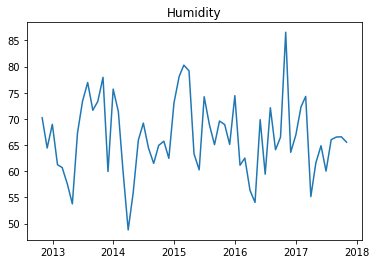

In [8]:
NewYork['datetime']=pd.to_datetime(NewYork['datetime'])
NewYork=NewYork.set_index('datetime')
NewYork_humidity_day=NewYork['humidity'].groupby([NewYork.index.year,NewYork.index.month])
NewYork_humidity_day.mean()
plt.plot(pd.date_range('10/2012','11/2017',freq='M'),NewYork_humidity_day.mean())
plt.title("Humidity") 

Text(0.5, 1.0, 'Temperature')

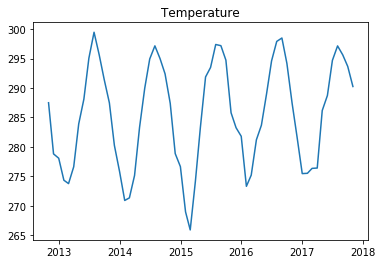

In [9]:
NewYork_temperature_day=NewYork['temperature'].groupby([NewYork.index.year,NewYork.index.month])
NewYork_temperature_day.mean()
plt.plot(pd.date_range('10/2012','11/2017',freq='M'),NewYork_temperature_day.mean())
plt.title("Temperature") 

Text(0.5, 1.0, 'Pressure')

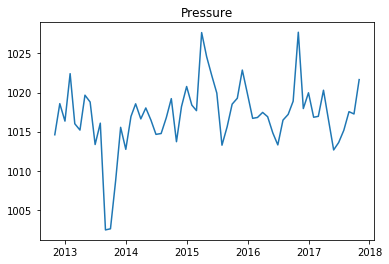

In [10]:
NewYork_pressure_day=NewYork['pressure'].groupby([NewYork.index.year,NewYork.index.month])
NewYork_pressure_day.mean()
plt.plot(pd.date_range('10/2012','11/2017',freq='M'),NewYork_pressure_day.mean())
plt.title("Pressure") 

Text(0.5, 1.0, 'Wind_speed')

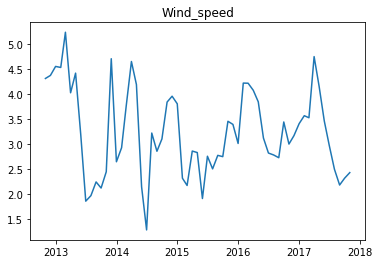

In [11]:
NewYork_wind_speed_day=NewYork['wind_speed'].groupby([NewYork.index.year,NewYork.index.month])
NewYork_wind_speed_day.mean()
plt.plot(pd.date_range('10/2012','11/2017',freq='M'),NewYork_wind_speed_day.mean())
plt.title("Wind_speed") 

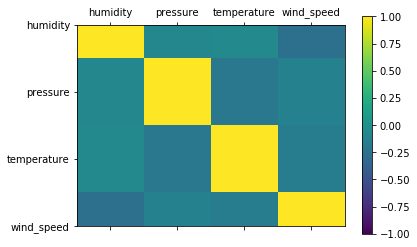

,humidity,pressure,temperature,wind_speed
humidity,1.000000,-0.071776,-0.061468,-0.262715
pressure,-0.071776,1.000000,-0.200341,-0.122940
temperature,-0.061468,-0.200341,1.000000,-0.160076
wind_speed,-0.262715,-0.122940,-0.160076,1.000000


In [12]:
correlations=NewYork.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names=['humidity','pressure','temperature','wind_speed']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show() 
NewYork.corr()

In [13]:
NewYork['weather_description'].value_counts()

sky is clear                           11341
broken clouds                           6142
mist                                    5399
scattered clouds                        4485
overcast clouds                         4316
light rain                              3947
few clouds                              3267
fog                                     1077
moderate rain                            933
haze                                     690
light intensity drizzle                  401
light snow                               383
heavy intensity rain                     369
drizzle                                  222
heavy snow                               120
proximity thunderstorm                   114
snow                                      98
very heavy rain                           82
thunderstorm                              74
thunderstorm with light rain              36
dust                                      21
thunderstorm with rain                    20
heavy inte

In [14]:
import sys
rain_forecast=NewYork.copy()
rain_forecast.replace({"sky is clear":0,"broken clouds":0,"mist":0,"scattered clouds":0,"overcast clouds":0,
                       "few clouds":0,'fog':0,'haze':0,'dust':0,'smoke':0,"squalls":0,"sand/dust whirls":0,
                       "sand":0,},inplace=True)
for i,j in enumerate(rain_forecast['weather_description']):
    if (j!=0):
        rain_forecast.ix[i,'weather_description']=1
rain_forecast['weather_description'].value_counts()

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


0    36753
1     6856
Name: weather_description, dtype: int64

In [15]:
rain_forecast

,humidity,pressure,temperature,wind_speed,weather_description
datetime,,,,,
2012-10-01 13:00:00,58.0,1012.0,288.220000,7.0,0
2012-10-01 14:00:00,57.0,1012.0,288.247676,7.0,0
2012-10-01 15:00:00,57.0,1012.0,288.326940,7.0,0
2012-10-01 16:00:00,57.0,1012.0,288.406203,7.0,0
2012-10-01 17:00:00,57.0,1012.0,288.485467,6.0,0
...,...,...,...,...,...
2017-10-27 20:00:00,36.0,1019.0,289.980000,3.0,0
2017-10-27 21:00:00,38.0,1019.0,289.480000,1.0,0
2017-10-27 22:00:00,54.0,1019.0,287.920000,2.0,0


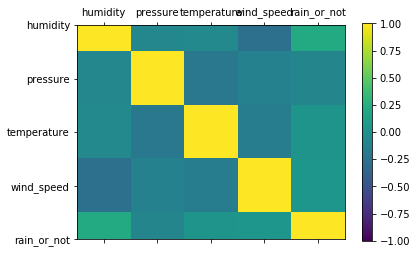

,humidity,pressure,temperature,wind_speed,weather_description
humidity,1.000000,-0.071776,-0.061468,-0.262715,0.222161
pressure,-0.071776,1.000000,-0.200341,-0.122940,-0.092566
temperature,-0.061468,-0.200341,1.000000,-0.160076,0.031276
wind_speed,-0.262715,-0.122940,-0.160076,1.000000,0.049747
weather_description,0.222161,-0.092566,0.031276,0.049747,1.000000


In [16]:
correlations=rain_forecast.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names=['humidity','pressure','temperature','wind_speed','rain_or_not']
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show() 
rain_forecast.corr()

In [17]:
rain_forecast.rename(columns={"weather_description":"rain_or_not"}, inplace=True)
rain_forecast.to_csv("rain_forecast.csv",index=False,sep=',') 
rain_forecast 

,humidity,pressure,temperature,wind_speed,rain_or_not
datetime,,,,,
2012-10-01 13:00:00,58.0,1012.0,288.220000,7.0,0
2012-10-01 14:00:00,57.0,1012.0,288.247676,7.0,0
2012-10-01 15:00:00,57.0,1012.0,288.326940,7.0,0
2012-10-01 16:00:00,57.0,1012.0,288.406203,7.0,0
2012-10-01 17:00:00,57.0,1012.0,288.485467,6.0,0
...,...,...,...,...,...
2017-10-27 20:00:00,36.0,1019.0,289.980000,3.0,0
2017-10-27 21:00:00,38.0,1019.0,289.480000,1.0,0
2017-10-27 22:00:00,54.0,1019.0,287.920000,2.0,0


In [18]:
newyork_mean = rain_forecast.resample('1D').mean()
newyork_mean.rename(columns={"humidity":"meanhum", "pressure":"meanpres", "temperature":"meantemp","wind_speed":"meanwsp"}, inplace=True)
newyork_mean.drop(columns='rain_or_not',inplace=True)
newyork_mean.head()

,meanhum,meanpres,meantemp,meanwsp
datetime,,,,
2012-10-01,56.272727,1012.000000,288.569420,6.363636
2012-10-02,50.950000,1012.000000,290.398367,5.550000
2012-10-03,68.541667,1015.541667,290.065625,2.416667
2012-10-04,94.545455,1016.772727,291.993636,2.045455
2012-10-05,93.041667,1019.250000,294.043542,1.375000


In [19]:
newyork_min = rain_forecast.resample('1D').min()
newyork_min.rename(columns={"humidity":"minhum", "pressure":"minpres", "temperature":"mintemp","wind_speed":"minwsp"}, inplace=True)
newyork_min.drop(columns='rain_or_not',inplace=True)
newyork_min.head()

,minhum,minpres,mintemp,minwsp
datetime,,,,
2012-10-01,55.0,1012.0,288.220000,6.0
2012-10-02,43.0,1011.0,289.040311,5.0
2012-10-03,46.0,1014.0,288.540000,0.0
2012-10-04,83.0,1015.0,290.120000,0.0
2012-10-05,78.0,1017.0,291.580000,0.0


In [20]:
newyork_max = rain_forecast.resample('1D').max()
newyork_max.rename(columns={"humidity":"maxhum", "pressure":"maxpres", "temperature":"maxtemp","wind_speed":"maxwsp"}, inplace=True)
newyork_max.head()

,maxhum,maxpres,maxtemp,maxwsp,rain_or_not
datetime,,,,,
2012-10-01,58.0,1012.0,288.961048,7.0,0
2012-10-02,55.0,1013.0,294.720000,6.0,0
2012-10-03,100.0,1017.0,292.880000,5.0,1
2012-10-04,100.0,1018.0,295.270000,3.0,1
2012-10-05,100.0,1020.0,296.270000,4.0,1


In [21]:
newyork=pd.merge(newyork_mean,newyork_min,how='left',on='datetime')
newyork=pd.merge(newyork,newyork_max,how='left',on='datetime')
newyork

,meanhum,meanpres,meantemp,meanwsp,minhum,minpres,mintemp,minwsp,maxhum,maxpres,maxtemp,maxwsp,rain_or_not
datetime,,,,,,,,,,,,,
2012-10-01,56.272727,1012.000000,288.569420,6.363636,55.0,1012.0,288.220000,6.0,58.0,1012.0,288.961048,7.0,0
2012-10-02,50.950000,1012.000000,290.398367,5.550000,43.0,1011.0,289.040311,5.0,55.0,1013.0,294.720000,6.0,0
2012-10-03,68.541667,1015.541667,290.065625,2.416667,46.0,1014.0,288.540000,0.0,100.0,1017.0,292.880000,5.0,1
2012-10-04,94.545455,1016.772727,291.993636,2.045455,83.0,1015.0,290.120000,0.0,100.0,1018.0,295.270000,3.0,1
2012-10-05,93.041667,1019.250000,294.043542,1.375000,78.0,1017.0,291.580000,0.0,100.0,1020.0,296.270000,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-24,83.000000,1012.416667,294.382500,5.500000,73.0,1008.0,293.060000,2.0,94.0,1018.0,296.230000,10.0,1
2017-10-25,73.208333,1007.083333,289.918750,2.250000,42.0,1005.0,286.150000,1.0,94.0,1008.0,292.900000,6.0,1
2017-10-26,54.125000,1005.916667,286.047500,2.500000,44.0,1005.0,283.840000,1.0,66.0,1009.0,288.060000,4.0,1


In [26]:
ny = newyork.round(2)
ny.to_csv("ny.csv",index=False,sep=',') 
ny=pd.read_csv("ny.csv")
ny

,meanhum,meanpres,meantemp,meanwsp,minhum,minpres,mintemp,minwsp,maxhum,maxpres,maxtemp,maxwsp,rain_or_not
0,56.27,1012.00,288.57,6.36,55.0,1012.0,288.22,6.0,58.0,1012.0,288.96,7.0,0
1,50.95,1012.00,290.40,5.55,43.0,1011.0,289.04,5.0,55.0,1013.0,294.72,6.0,0
2,68.54,1015.54,290.07,2.42,46.0,1014.0,288.54,0.0,100.0,1017.0,292.88,5.0,1
3,94.55,1016.77,291.99,2.05,83.0,1015.0,290.12,0.0,100.0,1018.0,295.27,3.0,1
4,93.04,1019.25,294.04,1.38,78.0,1017.0,291.58,0.0,100.0,1020.0,296.27,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,83.00,1012.42,294.38,5.50,73.0,1008.0,293.06,2.0,94.0,1018.0,296.23,10.0,1
1850,73.21,1007.08,289.92,2.25,42.0,1005.0,286.15,1.0,94.0,1008.0,292.90,6.0,1
1851,54.12,1005.92,286.05,2.50,44.0,1005.0,283.84,1.0,66.0,1009.0,288.06,4.0,1
1852,51.62,1017.17,283.77,1.92,33.0,1011.0,278.13,1.0,66.0,1020.0,289.98,3.0,0


In [22]:
tomorrow_meantemp=ny[["meantemp"]]
tomorrow_meantemp.drop(0,inplace=True)
tomorrow_meantemp.reset_index(drop=True,inplace=True)     
tomorrow_meantemp.rename(columns={"meantemp":"tomor_meantemp"}, inplace=True)
tomorrow_meantemp
ny.drop(1853,inplace=True)
ny=pd.merge(ny,tomorrow_meantemp,how='left',left_index=True, right_index=True)
ny

D:\Anaconda\anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda\anaconda\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,meanhum,meanpres,meantemp,meanwsp,minhum,minpres,mintemp,minwsp,maxhum,maxpres,maxtemp,maxwsp,rain_or_not,tomor_meantemp
0,56.27,1012.00,288.57,6.36,55.0,1012.0,288.22,6.0,58.0,1012.0,288.96,7.0,0,290.40
1,50.95,1012.00,290.40,5.55,43.0,1011.0,289.04,5.0,55.0,1013.0,294.72,6.0,0,290.07
2,68.54,1015.54,290.07,2.42,46.0,1014.0,288.54,0.0,100.0,1017.0,292.88,5.0,1,291.99
3,94.55,1016.77,291.99,2.05,83.0,1015.0,290.12,0.0,100.0,1018.0,295.27,3.0,1,294.04
4,93.04,1019.25,294.04,1.38,78.0,1017.0,291.58,0.0,100.0,1020.0,296.27,4.0,1,293.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,76.29,1025.71,290.65,3.21,63.0,1019.0,285.98,1.0,93.0,1029.0,295.82,8.0,0,294.38
1849,83.00,1012.42,294.38,5.50,73.0,1008.0,293.06,2.0,94.0,1018.0,296.23,10.0,1,289.92
1850,73.21,1007.08,289.92,2.25,42.0,1005.0,286.15,1.0,94.0,1008.0,292.90,6.0,1,286.05
1851,54.12,1005.92,286.05,2.50,44.0,1005.0,283.84,1.0,66.0,1009.0,288.06,4.0,1,283.77


In [28]:
features=["meanhum","minhum","maxhum","meanpres","minpres","maxpres","meanwsp","minwsp","maxwsp","meantemp","mintemp","maxtemp"]
X =ny[features]
y = ny[["tomor_meantemp"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
X

,meanhum,minhum,maxhum,meanpres,minpres,maxpres,meanwsp,minwsp,maxwsp,meantemp,mintemp,maxtemp
0,56.27,55.0,58.0,1012.00,1012.0,1012.0,6.36,6.0,7.0,288.57,288.22,288.96
1,50.95,43.0,55.0,1012.00,1011.0,1013.0,5.55,5.0,6.0,290.40,289.04,294.72
2,68.54,46.0,100.0,1015.54,1014.0,1017.0,2.42,0.0,5.0,290.07,288.54,292.88
3,94.55,83.0,100.0,1016.77,1015.0,1018.0,2.05,0.0,3.0,291.99,290.12,295.27
4,93.04,78.0,100.0,1019.25,1017.0,1020.0,1.38,0.0,4.0,294.04,291.58,296.27
...,...,...,...,...,...,...,...,...,...,...,...,...
1848,76.29,63.0,93.0,1025.71,1019.0,1029.0,3.21,1.0,8.0,290.65,285.98,295.82
1849,83.00,73.0,94.0,1012.42,1008.0,1018.0,5.50,2.0,10.0,294.38,293.06,296.23
1850,73.21,42.0,94.0,1007.08,1005.0,1008.0,2.25,1.0,6.0,289.92,286.15,292.90
1851,54.12,44.0,66.0,1005.92,1005.0,1009.0,2.50,1.0,4.0,286.05,283.84,288.06


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
features=["meanhum","minhum","maxhum","meanpres","minpres","maxpres",
          "meanwsp","minwsp","maxwsp","meantemp","mintemp","maxtemp"]
X = ny[features]
y = ny[["tomor_meantemp"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=23)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9186342256629398
0.9080937194161554


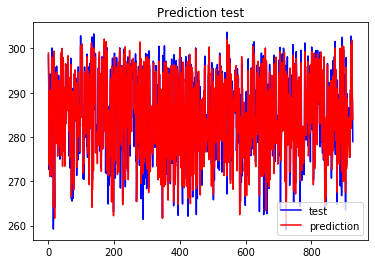

In [30]:
import matplotlib.pyplot as plt
plt.plot(list(range(927)),y_test,'b')
plt.plot(list(range(927)),model.predict(X_test),'r')
plt.title("Prediction test") 
plt.legend( ('test', 'prediction'))
plt.show() 

In [41]:
ny.describe().T 

,count,mean,std,min,25%,50%,75%,max
meanhum,1853.0,66.593794,14.539660,19.29,56.09,67.17,77.67,100.00
meanpres,1853.0,1017.029487,9.124992,974.83,1012.38,1017.04,1022.33,1049.62
meantemp,1853.0,285.380464,9.729040,259.02,277.64,286.04,294.21,304.70
meanwsp,1853.0,3.235893,1.590987,0.44,2.12,2.88,3.96,12.38
minhum,1853.0,45.792229,16.849432,10.00,33.00,44.00,57.00,100.00
minpres,1853.0,1011.676201,11.045990,959.00,1007.00,1013.00,1018.00,1047.00
mintemp,1853.0,281.488726,9.539320,250.77,274.32,281.86,289.73,299.48
minwsp,1853.0,1.206692,1.101206,0.00,1.00,1.00,2.00,7.00
maxhum,1853.0,86.735024,13.296764,26.00,80.00,92.00,98.00,100.00
maxpres,1853.0,1022.189423,8.766977,979.00,1017.00,1022.00,1027.00,1052.00


In [7]:
ny= pd.read_csv("xx.csv")
X = ny[[col for col in ny.columns if col != 'tomor_meantemp']]
y = ny['tomor_meantemp']
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   1482, Training features   13
Validation instances 186, Validation features 13
Testing instances    185, Testing features    13


In [8]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002387A693308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return  tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 44999444.0, step = 0
INFO:tensorflow:global_step/sec: 76.3704
INFO:tensorflow:loss = 48364.867, step = 100 (1.316 sec)
INFO:tensorflow:global_step/sec: 79.3828
INFO:tensorflow:loss = 47567.547, step = 200 (1.253 sec)
INFO:tensorflow:global_step/sec: 89.7723
INFO:tensorflow:loss = 44098.133, step = 30

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:28:43
INFO:tensorflow:Saving dict for global step 1200: average_loss = 97.866936, global_step = 1200, label/mean = 285.5936, loss = 18203.25, prediction/mean = 284.70218
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1200: tf_wx_model\model.ckpt-1200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 34093.586, step = 1200
INFO:tensorflow:global_step/sec: 77.4327
INFO:tensorflow:loss 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:29:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:29:26
INFO:tensorflow:Saving dict for global step 2800: average_loss = 68.91499, global_step = 2800, label/mean = 285.5936, loss = 12818.188, prediction/mean = 285.82068
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2800: tf_wx_model\model.ckpt-2800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:29:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluati

INFO:tensorflow:global_step/sec: 181.974
INFO:tensorflow:loss = 17437.596, step = 4100 (0.550 sec)
INFO:tensorflow:global_step/sec: 234.27
INFO:tensorflow:loss = 16425.803, step = 4200 (0.427 sec)
INFO:tensorflow:global_step/sec: 245.153
INFO:tensorflow:loss = 16665.184, step = 4300 (0.409 sec)
INFO:tensorflow:Saving checkpoints for 4400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 15157.821.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:29:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:29:48
INFO:tensorflow:Saving dict for global step 4400: average_loss = 41.801907, global_step = 4400, label/mean = 285.5936, loss = 7775.1543, prediction/mean = 285.36783
INF

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11610.984, step = 5600
INFO:tensorflow:global_step/sec: 202.561
INFO:tensorflow:loss = 11178.864, step = 5700 (0.495 sec)
INFO:tensorflow:global_step/sec: 223.812
INFO:tensorflow:loss = 12622.87, step = 5800 (0.448 sec)
INFO:tensorflow:global_step/sec: 237.601
INFO:tensorflow:loss = 11241.192, step = 5900 (0.422 sec)
INFO:tensorflow:Saving checkpoints for 6000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10603.856.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:30:10Z
INFO:tensorflow:Graph wa

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:30:27
INFO:tensorflow:Saving dict for global step 7200: average_loss = 19.565495, global_step = 7200, label/mean = 285.5936, loss = 3639.182, prediction/mean = 285.6223
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7200: tf_wx_model\model.ckpt-7200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 7595.5337, step = 7200
INFO:tensorflow:global_step/sec: 216.561
INFO:tensorflow:loss = 8870.031, step = 7300 (0.463 sec)
INFO:tensorflow:global_step/sec: 239.874
INFO:tensorflow:loss = 7951.209

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8800: tf_wx_model\model.ckpt-8800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:30:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:30:49
INFO:tensorflow:Saving dict for global step 8800: average_loss = 14.074693, global_step = 8800, label/mean = 285.5936, loss = 2617.8928, prediction/mean = 285.56168
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8800: tf_wx_model\model.ckpt-8800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8800
INFO:tensorflow:Running local_i

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:31:11
INFO:tensorflow:Saving dict for global step 10400: average_loss = 11.654075, global_step = 10400, label/mean = 285.5936, loss = 2167.658, prediction/mean = 285.8157
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10400: tf_wx_model\model.ckpt-10400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:31:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:31:12
INFO:tensorflow:Saving dict for global step 10400: average_loss = 11

INFO:tensorflow:loss = 4533.765, step = 11700 (0.480 sec)
INFO:tensorflow:global_step/sec: 231.031
INFO:tensorflow:loss = 4495.8604, step = 11800 (0.432 sec)
INFO:tensorflow:global_step/sec: 224.313
INFO:tensorflow:loss = 4307.5557, step = 11900 (0.446 sec)
INFO:tensorflow:Saving checkpoints for 12000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3925.443.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:31:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:31:34
INFO:tensorflow:Saving dict for global step 12000: average_loss = 10.630883, global_step = 12000, label/mean = 285.5936, loss = 1977.3442, prediction/mean = 285.7386
INFO:tensorflow:Saving 'checkpoint_path

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5003.6157, step = 13200
INFO:tensorflow:global_step/sec: 189.901
INFO:tensorflow:loss = 4300.152, step = 13300 (0.528 sec)
INFO:tensorflow:global_step/sec: 215.166
INFO:tensorflow:loss = 4203.9688, step = 13400 (0.465 sec)
INFO:tensorflow:global_step/sec: 225.828
INFO:tensorflow:loss = 4040.1985, step = 13500 (0.443 sec)
INFO:tensorflow:Saving checkpoints for 13600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4551.8794.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:31:56Z
INFO:tensorflow:G

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:32:14
INFO:tensorflow:Saving dict for global step 14800: average_loss = 10.109106, global_step = 14800, label/mean = 285.5936, loss = 1880.2937, prediction/mean = 285.76062
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14800: tf_wx_model\model.ckpt-14800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4689.459, step = 14800
INFO:tensorflow:global_step/sec: 209.327
INFO:tensorfl

INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:32:36
INFO:tensorflow:Saving dict for global step 16400: average_loss = 10.087898, global_step = 16400, label/mean = 285.5936, loss = 1876.3491, prediction/mean = 285.93283
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16400: tf_wx_model\model.ckpt-16400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:32:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:32:36
INFO:tensorflow:Saving dict for global step 16400: average_loss = 10.087898, global_step = 16400, label/mean = 285.5936, loss = 1876.3491, prediction/mean = 285.93283
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16400: tf_wx_model\model.

INFO:tensorflow:loss = 4228.2915, step = 17900 (0.452 sec)
INFO:tensorflow:Saving checkpoints for 18000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4184.804.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:33:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:33:00
INFO:tensorflow:Saving dict for global step 18000: average_loss = 9.92881, global_step = 18000, label/mean = 285.5936, loss = 1846.7587, prediction/mean = 285.7642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18000: tf_wx_model\model.ckpt-18000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:33:01Z
INFO:t

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3889.9292, step = 19200
INFO:tensorflow:global_step/sec: 206.737
INFO:tensorflow:loss = 3903.684, step = 19300 (0.485 sec)
INFO:tensorflow:global_step/sec: 227.364
INFO:tensorflow:loss = 3926.9583, step = 19400 (0.440 sec)
INFO:tensorflow:global_step/sec: 227.88
INFO:tensorflow:loss = 3625.0164, step = 19500 (0.439 sec)
INFO:tensorflow:Saving checkpoints for 19600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4670.733.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:33:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runni

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:33:40
INFO:tensorflow:Saving dict for global step 20800: average_loss = 9.9912195, global_step = 20800, label/mean = 285.5936, loss = 1858.3668, prediction/mean = 286.04645
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20800: tf_wx_model\model.ckpt-20800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4107.8013, step = 20800
INFO:tensorflow:global_step/sec: 204.628
INFO:tensorflow:loss = 4465.3936, step = 20900 (0.490 sec)
INFO:tensorflow:global_step/sec: 224.815
INFO:tensorflow:loss = 3977.488, step = 21000 (0.445 sec)
I

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22400: tf_wx_model\model.ckpt-22400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:34:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:34:03
INFO:tensorflow:Saving dict for global step 22400: average_loss = 10.167649, global_step = 22400, label/mean = 285.5936, loss = 1891.1827, prediction/mean = 286.2589
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22400: tf_wx_model\model.ckpt-22400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22400
INFO:tensorflow:Running 

INFO:tensorflow:Starting evaluation at 2019-11-28T23:34:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:34:25
INFO:tensorflow:Saving dict for global step 24000: average_loss = 9.678266, global_step = 24000, label/mean = 285.5936, loss = 1800.1573, prediction/mean = 285.63882
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24000: tf_wx_model\model.ckpt-24000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:34:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:34:26
INFO:te

INFO:tensorflow:global_step/sec: 192.822
INFO:tensorflow:loss = 4257.1543, step = 25300 (0.520 sec)
INFO:tensorflow:global_step/sec: 225.828
INFO:tensorflow:loss = 3902.3606, step = 25400 (0.443 sec)
INFO:tensorflow:global_step/sec: 222.817
INFO:tensorflow:loss = 4106.078, step = 25500 (0.450 sec)
INFO:tensorflow:Saving checkpoints for 25600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3832.9497.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:34:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:34:48
INFO:tensorflow:Saving dict for global step 25600: average_loss = 9.637774, global_step = 25600, label/mean = 285.5936, loss = 1792.626, prediction/mean = 285.7155

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 26800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4001.438, step = 26800
INFO:tensorflow:global_step/sec: 208.457
INFO:tensorflow:loss = 3704.3848, step = 26900 (0.481 sec)
INFO:tensorflow:global_step/sec: 219.404
INFO:tensorflow:loss = 3987.735, step = 27000 (0.456 sec)
INFO:tensorflow:global_step/sec: 229.446
INFO:tensorflow:loss = 4086.58, step = 27100 (0.436 sec)
INFO:tensorflow:Saving checkpoints for 27200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3929.7385.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:35:11Z
INFO:tensorflow:Grap

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:35:29
INFO:tensorflow:Saving dict for global step 28400: average_loss = 9.54129, global_step = 28400, label/mean = 285.5936, loss = 1774.6799, prediction/mean = 285.62704
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 28400: tf_wx_model\model.ckpt-28400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 28400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4545.042, step = 28400
INFO:tensorflow:global_step/sec: 186.025
INFO:tensorflow

INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:35:52
INFO:tensorflow:Saving dict for global step 30000: average_loss = 9.91678, global_step = 30000, label/mean = 285.5936, loss = 1844.5212, prediction/mean = 286.24646
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30000: tf_wx_model\model.ckpt-30000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:35:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:35:53
INFO:tensorflow:Saving dict for global step 30000: average_loss = 9.91678, global_step = 30000, label/mean = 285.5936, loss = 1844.5212, prediction/mean = 286.24646
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30000: tf_wx_model\model.ckpt

INFO:tensorflow:loss = 3326.139, step = 31500 (0.445 sec)
INFO:tensorflow:Saving checkpoints for 31600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3842.6113.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:36:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-31600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:36:15
INFO:tensorflow:Saving dict for global step 31600: average_loss = 9.458647, global_step = 31600, label/mean = 285.5936, loss = 1759.3082, prediction/mean = 285.58542
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 31600: tf_wx_model\model.ckpt-31600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:36:16Z
INFO

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-32800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3932.4663, step = 32800
INFO:tensorflow:global_step/sec: 196.99
INFO:tensorflow:loss = 3423.2253, step = 32900 (0.511 sec)
INFO:tensorflow:global_step/sec: 217.5
INFO:tensorflow:loss = 4115.6016, step = 33000 (0.458 sec)
INFO:tensorflow:global_step/sec: 218.448
INFO:tensorflow:loss = 3584.3396, step = 33100 (0.459 sec)
INFO:tensorflow:Saving checkpoints for 33200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3807.179.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:36:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-33200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runnin

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:36:57
INFO:tensorflow:Saving dict for global step 34400: average_loss = 9.452313, global_step = 34400, label/mean = 285.5936, loss = 1758.1304, prediction/mean = 285.83514
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 34400: tf_wx_model\model.ckpt-34400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-34400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3625.4685, step = 34400
INFO:tensorflow:global_step/sec: 202.971
INFO:tensorflow:loss = 4198.3228, step = 34500 (0.495 sec)
INFO:tensorflow:global_step/sec: 219.885
INFO:tensorflow:loss = 3781.7585, step = 34600 (0.454 sec)
I

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36000: tf_wx_model\model.ckpt-36000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:37:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-36000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:37:21
INFO:tensorflow:Saving dict for global step 36000: average_loss = 9.398047, global_step = 36000, label/mean = 285.5936, loss = 1748.0367, prediction/mean = 285.4167
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36000: tf_wx_model\model.ckpt-36000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-36000
INFO:tensorflow:Running l

INFO:tensorflow:Starting evaluation at 2019-11-28T23:37:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-37600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:37:43
INFO:tensorflow:Saving dict for global step 37600: average_loss = 9.335676, global_step = 37600, label/mean = 285.5936, loss = 1736.4358, prediction/mean = 285.60397
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 37600: tf_wx_model\model.ckpt-37600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:37:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-37600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-28-23:37:43
INFO:te

INFO:tensorflow:global_step/sec: 211.982
INFO:tensorflow:loss = 4240.918, step = 38900 (0.473 sec)
INFO:tensorflow:global_step/sec: 231.565
INFO:tensorflow:loss = 3758.2627, step = 39000 (0.432 sec)
INFO:tensorflow:global_step/sec: 219.885
INFO:tensorflow:loss = 4684.4644, step = 39100 (0.456 sec)
INFO:tensorflow:Saving checkpoints for 39200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3867.0537.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-28T23:38:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-39200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-11-28-23:38:06
INFO:tensorflow:Saving dict for global step 39200: average_loss = 9.313053, global_step = 39200, label/mean = 285.5936, loss = 1732.2279, prediction/mean = 285.667

In [10]:
evaluations[0]

{'average_loss': 116.275345,
 'label/mean': 285.5936,
 'loss': 21627.215,
 'prediction/mean': 285.44354,
 'global_step': 400}

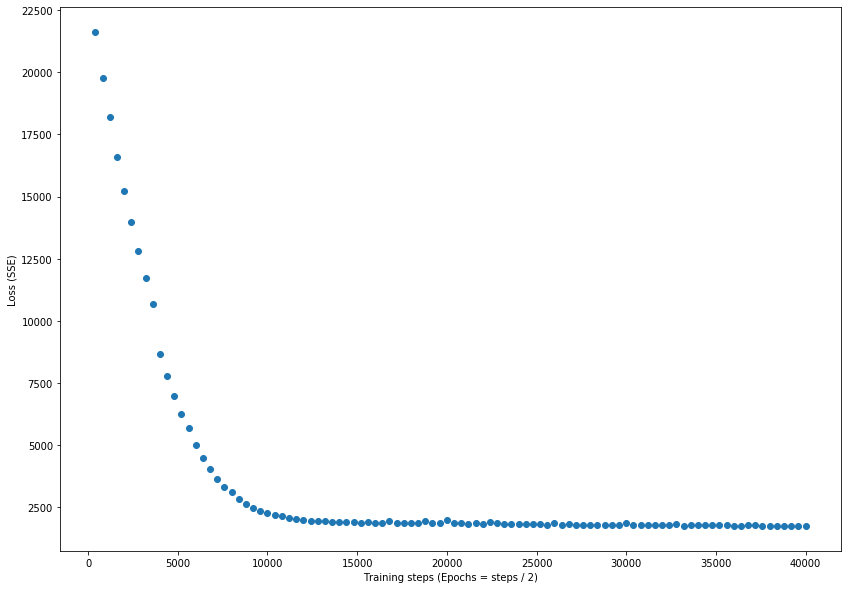

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [14, 10]
loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]
plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [12]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])
print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Kelvins" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Kelvins" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.91
The Mean Absolute Error: 2.16 degrees Kelvins
The Median Absolute Error: 1.57 degrees Kelvins


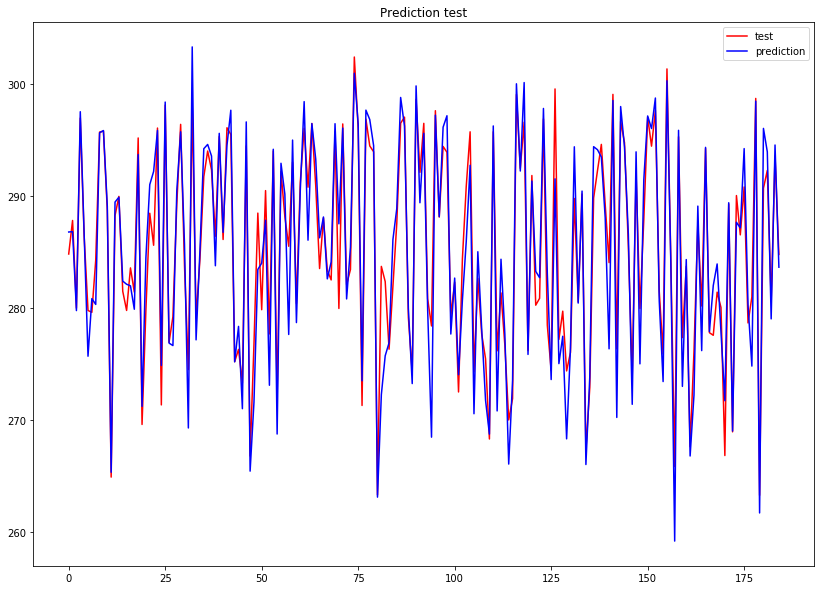

In [13]:
ty=y_test
ty.reset_index(drop=True,inplace=True)
p1=plt.plot(predictions,color='red')
p2=plt.plot(ty,color='blue')
plt.title("Prediction test") 
plt.legend( ('test', 'prediction'))
plt.show() 

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import math
train_max_row = math.floor(ny.shape[0] * .6)
train = ny.iloc[:train_max_row]
test = ny.iloc[train_max_row:]
feature=["meanhum","minhum","maxhum","meanpres","minpres","maxpres",
         "meanwsp","minwsp","maxwsp","meantemp","mintemp","maxtemp"]
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(train[feature], train["rain_or_not"])

predictions = clf.predict(test[feature])
test_auc = roc_auc_score(test["rain_or_not"], predictions)
train_predictions = clf.predict(train[feature])
train_auc = roc_auc_score(train["rain_or_not"], train_predictions)
print(train_auc)
print(test_auc)

0.7368990658464343
0.6490835755874145


In [39]:
from sklearn.ensemble import RandomForestClassifier
train_max_row = math.floor(ny.shape[0] * 0.7)
train = ny.iloc[:train_max_row]
test = ny.iloc[train_max_row:]
clf = RandomForestClassifier(n_estimators=1)
clf.fit(train[feature], train["rain_or_not"])

predictions = clf.predict(train[feature])
a=roc_auc_score(train["rain_or_not"], predictions)
print(a)
predictions = clf.predict(test[feature])
b=roc_auc_score(test["rain_or_not"], predictions)
print(b)

0.8502583465818759
0.6415343915343915


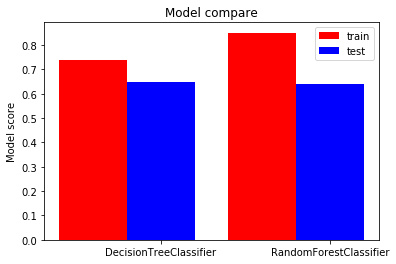

In [40]:
name_list = ['DecisionTreeClassifier', 'RandomForestClassifier']
num_list = [train_auc, a]
num_list1 = [test_auc,b]
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, num_list, width=width, label='train',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='test',tick_label = name_list,fc = 'b')
plt.legend()
plt.ylabel("Model score")
plt.title("Model compare")
plt.show()